Rutuja Badve
First we will load our cleaned datasets

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

anime_df = pd.read_csv("anime_dataset.xls")
user_scores = pd.read_csv("user_scores_d.xls")
users_details = pd.read_csv("users_details_dataset.xls")

In [15]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19976 entries, 0 to 19975
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     19976 non-null  int64  
 1   anime_id       19976 non-null  int64  
 2   Name           19976 non-null  object 
 3   English name   19976 non-null  object 
 4   Other name     19976 non-null  object 
 5   Score          19976 non-null  object 
 6   Genres         19976 non-null  object 
 7   Synopsis       19976 non-null  object 
 8   Type           19976 non-null  object 
 9   Episodes       19682 non-null  float64
 10  Aired          19976 non-null  object 
 11  Start Date     16957 non-null  object 
 12  End Date       8858 non-null   object 
 13  Premiered      19976 non-null  object 
 14  Status         19976 non-null  object 
 15  Producers      19976 non-null  object 
 16  Licensors      19976 non-null  object 
 17  Studios        19976 non-null  object 
 18  Source

In [16]:
users_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41486 entries, 0 to 41485
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        41486 non-null  int64  
 1   Mal ID            41486 non-null  int64  
 2   Username          41486 non-null  object 
 3   Gender            40316 non-null  object 
 4   Birthday          41486 non-null  object 
 5   Location          41486 non-null  object 
 6   Joined            41486 non-null  object 
 7   Days Watched      41485 non-null  float64
 8   Mean Score        41485 non-null  float64
 9   Watching          41485 non-null  float64
 10  Completed         41485 non-null  float64
 11  On Hold           41485 non-null  float64
 12  Dropped           41485 non-null  float64
 13  Plan to Watch     41485 non-null  float64
 14  Total Entries     41485 non-null  float64
 15  Rewatched         41485 non-null  float64
 16  Episodes Watched  41485 non-null  float6

In [17]:
user_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5239975 entries, 0 to 5239974
Data columns (total 6 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   user_id      int64 
 2   Username     object
 3   anime_id     int64 
 4   Anime Title  object
 5   rating       int64 
dtypes: int64(4), object(2)
memory usage: 239.9+ MB


1.Do different age groups prefer anime with varying durations?

Ans: We are using K means clustering to find the relationship between age groups and duration of episodes of animes.

In [5]:
joined_df = users_details.merge(user_scores, on='Username')
joined_df = joined_df.merge(anime_df[['anime_id', 'Episodes']], on='anime_id')
joined_df = joined_df.dropna(subset=['Age_Join', 'Episodes'])

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Feature = joined_df[['Age_Join', 'Episodes']]

scaler = StandardScaler()
Feature_scaled = scaler.fit_transform(Feature)

In [21]:
kmeans = KMeans(n_clusters=6, random_state=8)
joined_df['Cluster'] =kmeans.fit_predict(Feature_scaled)

After trying for different k values, have selected 6 as it is giving classification which includes variance in our dataset.

I have choosen K means for following reasons:


*   As we want to cluster unknown data, as we are not familiar with relationship of age group and number of episodes we use K means because it is a simple clusterring algorithm.
*   As it is unsupervised algorithm it will be able to find the hidden relationship among parameters
*   K means works well with large datasets and our dataset is very large

For training the Model:


*   Have selected the important features like age and number of episodes which are necessary
*   Have normalized the data to fit well for our prediction


*   The number of k has been choosen by trial and error method











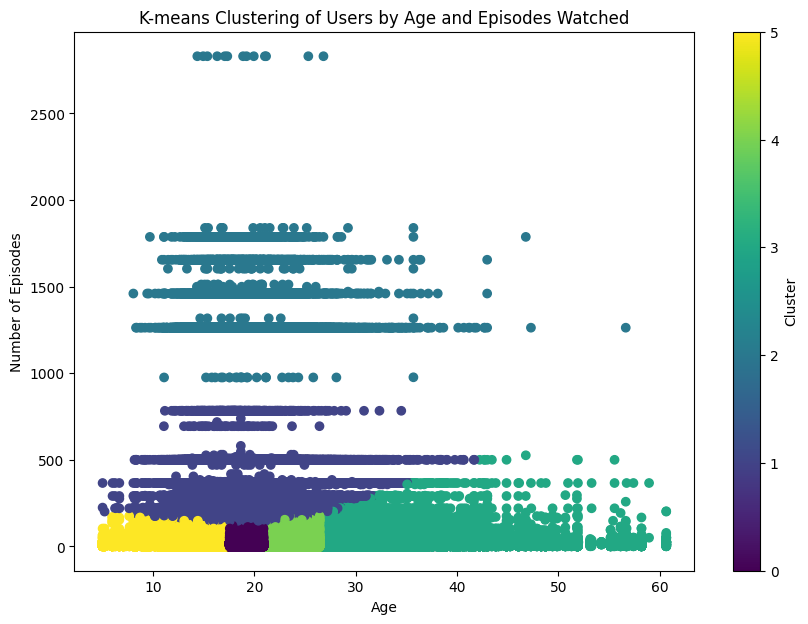

In [23]:
plt.figure(figsize=(10, 7))
plt.scatter(joined_df['Age_Join'], joined_df['Episodes'], c=joined_df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Number of Episodes')
plt.title('K-means Clustering of Users by Age and Episodes Watched')
plt.colorbar(label='Cluster')
plt.show()

The K means have given us well defined clusters and we can make out some predictions through the above graph

We can see that the older people do not prefer animes which have lots of episodes.

There is a age group between 10 to 35 which can watch many number of episodes but the same group also has sub groups within it that prefer watching different lenght of anime

Now we will use DBSCAN Algorithm to analyze the first question

Reference taken from:https://builtin.com/articles/dbscan#:~:text=DBSCAN%20works%20by%20partitioning%20the,are%20considered%20outliers%20or%20noise.

We are using DBSCAN as it is better than K-means for clusterring purpose, K-means will have only sperical clusters but DBSCAN can have various shaped clusters. Here as our data and relationship is unknown DBSCAN can give us more accurate results.

It is also useful for identifying outliers, the gray points that we observe in output plot are the outliers and we can get rid of them to make our model more accurate.

DBSCAN gave us 7 different clusters indicating that there exists 7 different classes in our dataset, we can use this information in our K- means algorithm.

Number of clusters found by DBSCAN: 7


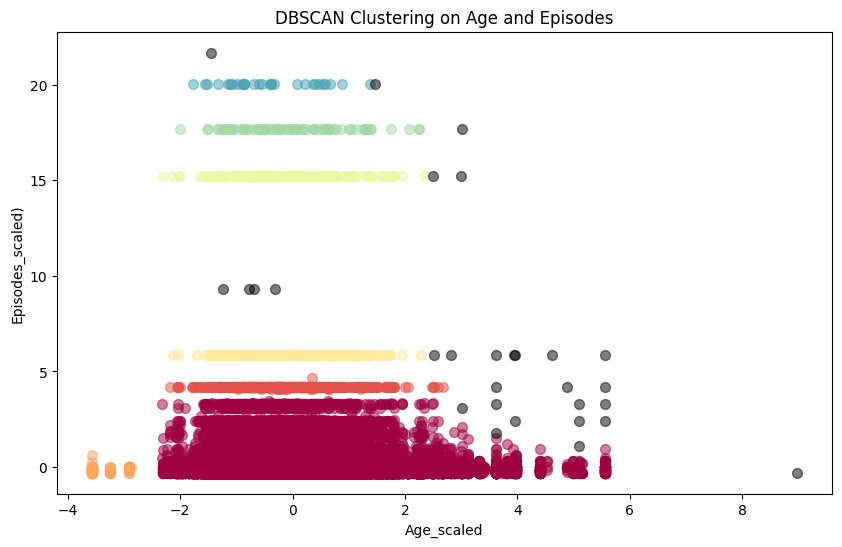

Indices of core samples:  [     0      1      2 ... 117539 117540 117541]
Core samples_centroids: 
 [[ 0.03212692 -0.2887712 ]
 [ 0.12026636  0.01860741]
 [-0.67138602 -0.2887712 ]
 ...
 [ 2.29170151 -0.14122947]
 [ 0.18917537 -0.2887712 ]
 [ 0.51288747 -0.27647606]]
Labels assigned to each point: [0 0 0 ... 0 0 0]
Number of features seen during fit:  2


In [8]:
#https://builtin.com/articles/dbscan#:~:text=DBSCAN%20works%20by%20partitioning%20the,are%20considered%20outliers%20or%20noise.
from sklearn.cluster import DBSCAN
sampled_df = Feature.sample(frac=0.4, random_state=42)

sampled_df =sampled_df[['Age_Join', 'Episodes']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(sampled_df)


dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_data)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = scaled_data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.5)

plt.title ('DBSCAN Clustering on Age and Episodes')
plt.xlabel('Age_scaled')
plt.ylabel('Episodes_scaled)')
plt.show()

print("Indices of core samples: ", dbscan.core_sample_indices_)
print("Core samples_centroids: \n", dbscan.components_)
print("Labels assigned to each point:", dbscan.labels_)
print("Number of features seen during fit: ", dbscan.n_features_in_)

2.Does the number of episodes affect the score of anime?

Ans: For this we first plot a graph to see if the relationship between score and number of episodes is linear or not.

Text(0, 0.5, 'Anime Score')

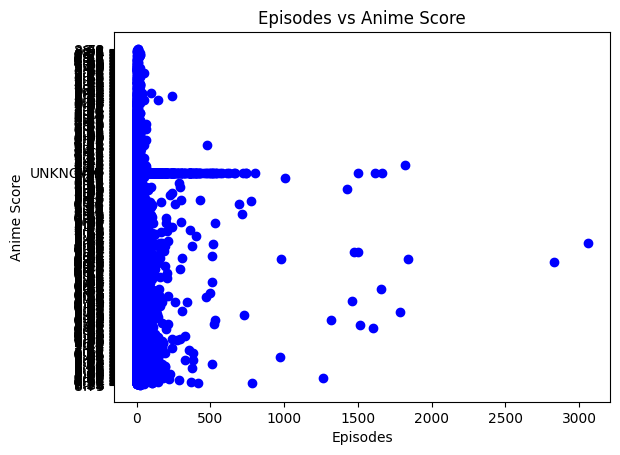

In [12]:
#We plot the relationship to find out if it is linear or not
import matplotlib.pyplot as plt

plt.scatter(anime_df['Episodes'], anime_df['Score'], color='blue')

plt.title('Episodes vs Anime Score')
plt.xlabel('Episodes')
plt.ylabel('Anime Score')

As the relationship is not linear we use non linear regression algorithms

We are using Support Vector Regression algorithm:
Reference taken from:https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/

SVR is robust to outliers and as we use it in large dataset we are removing the outlines.



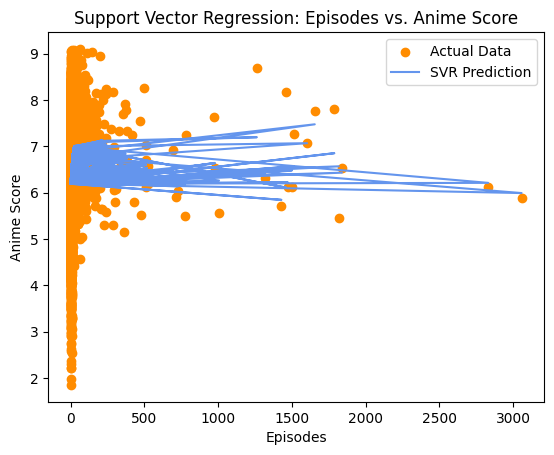

In [13]:
#https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/
from sklearn.svm import SVR

anime_df['Episodes'] = pd.to_numeric(anime_df['Episodes'], errors='coerce')
anime_df['Score'] = pd.to_numeric(anime_df['Score'], errors='coerce')

anime_df = anime_df.dropna(subset=['Episodes', 'Score'])


X = anime_df[['Episodes']].values
y = anime_df['Score'].values

svr = SVR(kernel='rbf')

svr.fit(X, y)

y_pred = svr.predict(X)

plt.scatter(X, y, color='darkorange', label='Actual Data')
plt.plot(X, y_pred, color='cornflowerblue', label='SVR Prediction')
plt.xlabel('Episodes')
plt.ylabel('Anime Score')
plt.title('Support Vector Regression: Episodes vs. Anime Score')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 0.7019815620007238
Mean Squared Error (MSE): 0.7727067390175613


SVR gave us moderate results to improve them we need to hypertune our parameters

We are using XGBoost Algorithm:
Reference taken from:https://www.datacamp.com/tutorial/xgboost-in-python

XGBoost excels in captoring complex relationships


In [10]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


In [11]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

anime_df = anime_df.dropna(subset=['Episodes', 'Score'])

anime_df_sampled = anime_df.sample(frac=0.3, random_state=42)

cat_cols = anime_df_sampled.select_dtypes(include=['object']).columns.tolist()

label_encoder = LabelEncoder()

for col in cat_cols:
    anime_df_sampled[col] = label_encoder.fit_transform(anime_df_sampled[col])


X = anime_df_sampled[['Episodes']]
y = anime_df_sampled['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

dtrain_xg = xgb.DMatrix(X_train, y_train)
dtest_xg = xgb.DMatrix(X_test, y_test)

params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse"
}

n_rounds = 180

model = xgb.train(
    params=params,
    dtrain=dtrain_xg,
    num_boost_round=n_rounds
)

preds = model.predict(dtest_xg)

rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE of the XGBoost model: {rmse:.3f}")

RMSE of the XGBoost model: 126.593


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [6]:
print(y.describe())

count    3936.000000
mean      306.004573
std       125.746713
min         0.000000
25%       209.000000
50%       300.000000
75%       461.000000
max       461.000000
Name: Score, dtype: float64


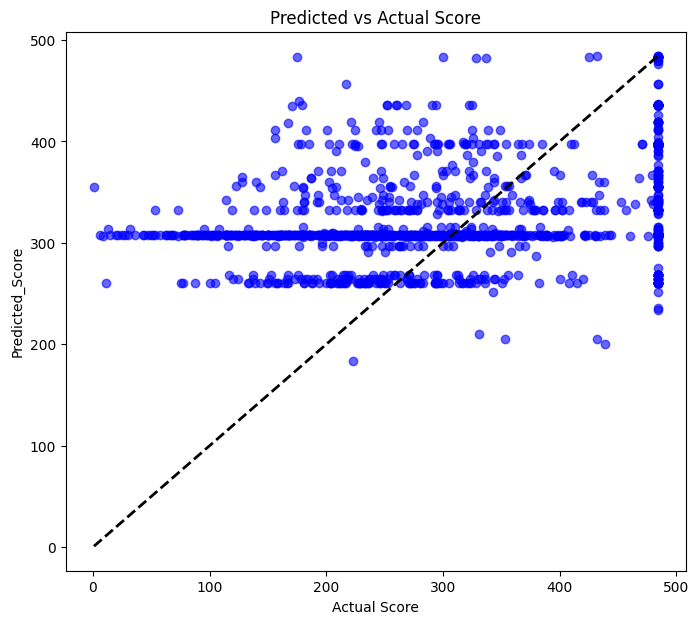

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 7))
plt.scatter(y_test, preds, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Score')
plt.ylabel('Predicted_Score')
plt.title('Predicted vs Actual Score')
plt.show()